In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, train_test_split, KFold, train_test_split
import matplotlib as mpl
from matplotlib import rc

# LaTex Stuff
latex_path = "/usr/local/texlive/2023/bin/x86_64-linux"
os.environ["PATH"] = f"{latex_path}:{os.environ['PATH']}"
mpl.rcParams["text.usetex"] = True
mpl.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
rc("text", usetex=True)
plt.rcParams["font.family"] = "serif"

In [26]:
alphas = np.linspace(0.00000001, 0.001, 5000)  # (valor inicial, valor final, n.º de prontos)
x = np.load("X_train_regression1.npy")
y = np.load("y_train_regression1.npy")
# x = np.delete(x, 9, 0)
# y = np.delete(y, 9, 0)
# x = np.delete(x, 7, 0)
# y = np.delete(y, 7, 0)

x = np.delete(x, 0, 1)
x = np.delete(x, 3, 1)
x = np.delete(x, 5, 1)
# x = np.delete(x, 5, 1)

In [27]:
alphas_ridge = np.arange(0.01, 5, 0.1)
param_grid = {'alpha': alphas_ridge}

grid_ridge = Ridge()
grid_search = GridSearchCV(grid_ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x, y)

print(grid_search.best_estimator_)
print(grid_search.best_params_)

Ridge(alpha=0.81)
{'alpha': 0.81}


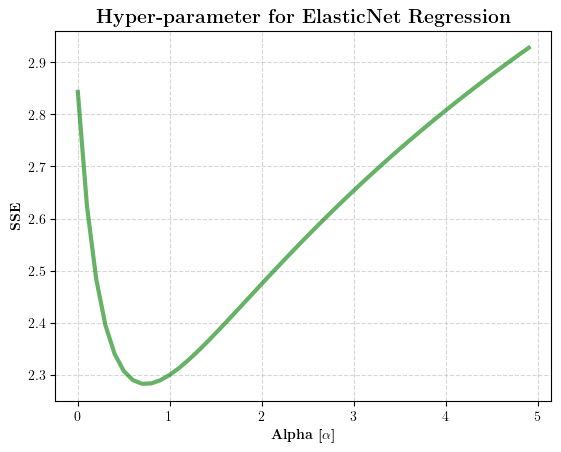

Best SSE: 2.282619405132183
Best Alpha: 0.7010000000000001


In [28]:
alphas_plot = np.arange(0.001, 5, 0.1)
num_iterations = [30, 37, 39, 1, 29, 5, 8, 13, 7, 19, 17, 2, 3, 9, 15]
remove_points = [30, 31, 1, 4, 2, 5, 3, 8, 7, 36, 12, 18, 24]
scores = [[] for _ in range(len(num_iterations))] 
list_sse = []
index_alpha = []

for i in range(len(num_iterations)):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1, train_size=14, random_state=num_iterations[i])
    for j in alphas_plot:
        ridge_model = Ridge(alpha=j, max_iter=100000)
        ridge_model.fit(X_train, y_train)
        sse = (np.linalg.norm(y_test - ridge_model.predict(X_test))) ** 2
        # print(f'SSE for alpha {j}: {sse} (iteration {i})')
        scores[i].append(sse)

index_alpha = alphas_plot
for i, alpha in enumerate(alphas_plot):
    list_sse.append(np.mean([scores[j][i] for j in range(len(num_iterations))]))

plt.plot(index_alpha, list_sse, color="green", linewidth=3, alpha=0.6)
plt.xlabel(r"\textbf{Alpha [$\alpha$]}")
plt.ylabel(r"\textbf{SSE}")
plt.title(r"\textbf{Hyper-parameter for ElasticNet Regression}", fontsize=14)
plt.grid(linestyle = '--', alpha=0.5)
plt.show()
min_value = min(list_sse)
print(f'Best SSE: {min_value}')
print(f'Best Alpha: {index_alpha[list_sse.index(min_value)]}')
np.savetxt('x.txt', index_alpha, fmt='%f')
np.savetxt('y.txt', list_sse, fmt='%f')